In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data into datframe
df= pd.read_csv("C:/Users/USER/Desktop/DATA SCIENCE/price_of_housing_in_nigeria/nigeria_houses_data.csv")

In [3]:
# EXPLORATION
# Checking for missing values
df.info()  # No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [4]:
df["price"] = df["price"]/10000
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,45000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,80000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,12000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,4000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,7500.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,1500.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,2500.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,6800.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,7800.0


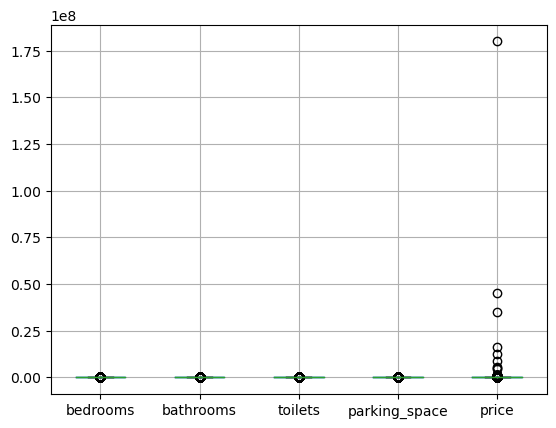

In [5]:
#Checking for caegeorical columns with low or high cardinality
df.select_dtypes("object").nunique()
#Column Town has high cardinality value and will be dropped
df = df.drop(columns=["town"])
#Lets check for Outliers
df.boxplot(column=['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price'])
plt.show()

In [6]:
# import pandas as pd


# # Function to detect outliers using IQR
# def detect_outliers_iqr(df):
#     outliers = {}
#     for col in ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#     return outliers

# outliers = detect_outliers_iqr(df)
# for col, outlier_df in outliers.items():
#     print(f'Outliers in {col}:')
#     print(outlier_df)


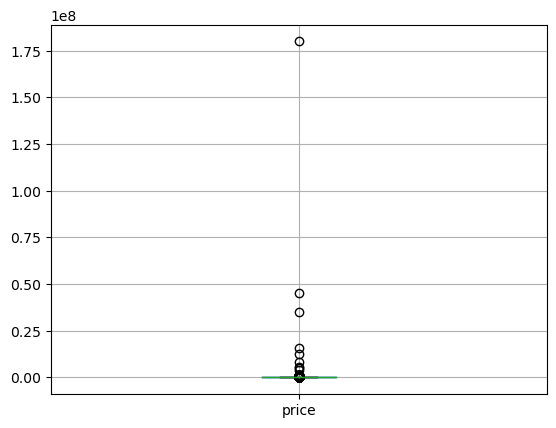

In [7]:
df.boxplot(column=[ 'price'])
plt.show()

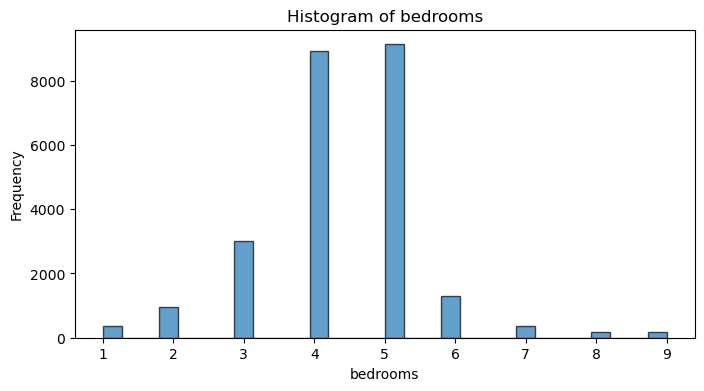

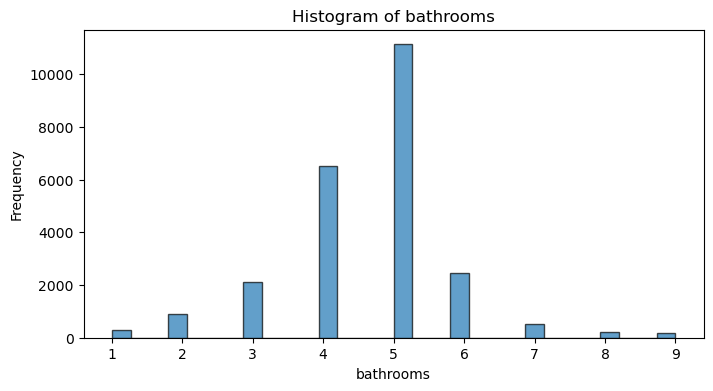

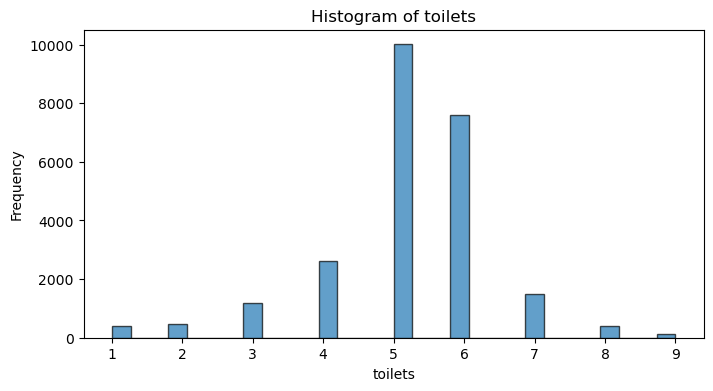

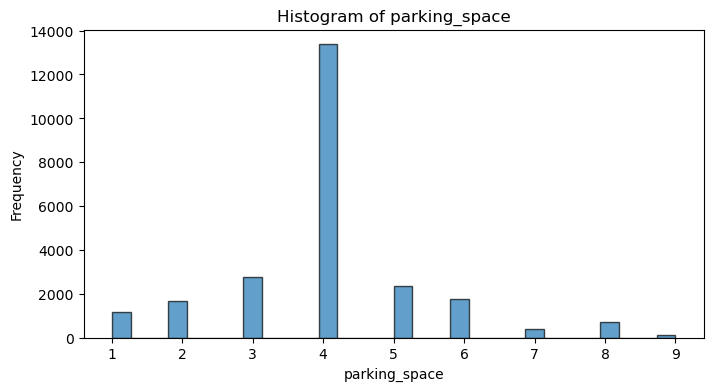

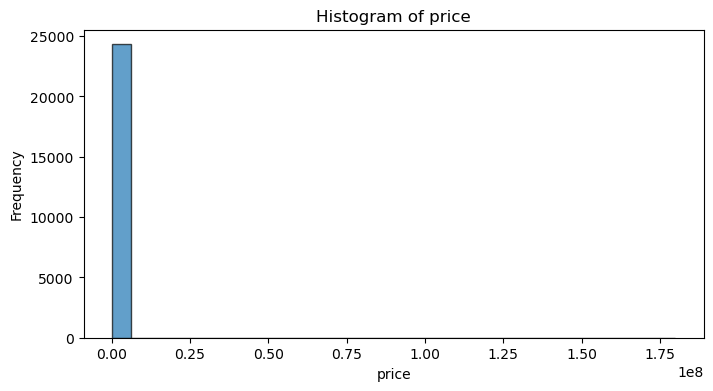

In [8]:
# List of numerical columns
numerical_columns = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']  

# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [9]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+04
std,1.138497,1.163161,1.226253,1.399936,1.220403e+06
min,1.000000,1.000000,1.000000,1.000000,9.000000e+00
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+03
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+03
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+04
max,9.000000,9.000000,9.000000,9.000000,1.800000e+08


In [15]:
low, high =df['price'].quantile([0.25,0.75])
mask =df['price'].between(low,high)
df = df[mask]
df
# low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
# mask_area = df["surface_covered_in_m2"].between(low, high)
# df = df[mask_area]


,bedrooms,bathrooms,toilets,parking_space,title,state,price
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lagos,7500.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lagos,6500.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Lagos,6000.0
12,4.0,5.0,6.0,3.0,Semi Detached Duplex,Lagos,6500.0
13,4.0,4.0,5.0,4.0,Semi Detached Duplex,Lagos,7000.0
...,...,...,...,...,...,...,...
24317,4.0,4.0,5.0,3.0,Terraced Duplexes,Lagos,7500.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lagos,8000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lagos,6800.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Lagos,7800.0


In [16]:
# desc = df.describe()
# def get_iqr_bounds(df, price):
#     Q1 = desc.at['25%', price]
#     Q3 = desc.at['75%', price]
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return lower_bound, upper_bound

# # Subset the DataFrame based on IQR
# subset_df = df.copy()
# for column in df['price']:
#     lower_bound, upper_bound = get_iqr_bounds(df, "price")
#     df = subset_df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]
    
# df

In [17]:
#Splitting Data Into Training Set and Test Set

# target = "price"
# features = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'state']
# y=df[target]
# X=df[features]
# cut_off_x = int(len(X)*0.8)
# cut_off_y = int(len(y)*0.8)
# X_train = X.iloc[:cut_off_x]
# X_test = X.iloc[cut_off_x:]
# y_train = y.iloc[:cut_off_y]
# y_test = y.iloc[cut_off_y:]


In [18]:

from sklearn.model_selection import train_test_split

target = "price"
features = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'state']

y = df[target]
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# BASELINE
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
from sklearn.metrics import mean_absolute_error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
mae_baseline
# mae Baseline is 703.6607333559788

811.0613371043451

In [20]:
# ITERATION PHASE
#Instantiate the model
from sklearn.linear_model import LinearRegression, Ridge  
#from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Create a column transformer to apply OneHotEncoder to categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['title', 'state'])  # Apply OneHotEncoder to categorical columns
    ],
    remainder='passthrough'  # Keep the numerical columns as it is
)

# Create the pipeline
model = make_pipeline(column_transformer, Ridge())

# Fit the model
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['title', 'state'])])),
                ('ridge', Ridge())])

In [21]:
# MODEL EVALUATION
y_pred_training = model.predict(X_train)
training_mae=mean_absolute_error(y_train,y_pred_training)
training_mae
#training mae is 672.4110350144385 which is lower than baseline_mae...this looks good!

772.3782681749813

In [22]:
# TEST MODEL
y_pred_test = model.predict(X_test)
test_mae=mean_absolute_error(y_test,y_pred_test)
test_mae
#test mae is 685.7539378470954 which is higher than training_mae...this looks like its overfitting, not good!

766.0777459676326

In [24]:
#Communicate Result
def make_prediction(bedrooms, bathrooms, toilets, parking_space, title, state):
    data = {
    'bedrooms':bedrooms,
    'bathrooms': bathrooms,
    'toilets': toilets,
    'parking_space': parking_space,
    'title':title,
    'state':state
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [25]:
make_prediction(4, 4, 5, 2, "Semi Detached Duplex", "Lagos")

'Predicted apartment price: $7126.15'